In [55]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import sys
import os

In [ ]:
assert len(sys.argv) == 2
log_file_path = sys.argv[-1]
basename = os.path.basename(log_file_path)

In [ ]:
print("parsing {}".format(log_file_path))
os.system('python /home/chenxi/repository/caffe_public/tools/extra/parse_log.py {} vis'.format(log_file_path))

In [50]:
train = pd.read_csv(os.path.join('vis', basename + '.train'))
test = pd.read_csv(os.path.join('vis', basename + '.test'))

In [51]:
win_size = 11
half = win_size // 2
iters_train = np.array(train['NumIters'])[1:]
lr_train = np.array(train['LearningRate'])[1:]
acc_train = np.array(train['accuracy'])
acc_train_smooth = np.convolve(np.hamming(win_size), acc_train[1:])[half:-half]
loss_train = np.array(train['loss'])
loss_train_smooth = np.convolve(np.hamming(win_size), loss_train[1:])[half:-half]

iters_test = np.array(test['NumIters'])[1:]
lr_test = np.array(test['LearningRate'])[1:]
acc_test = np.array(test['accuracy'])
acc_test_smooth = np.convolve(np.hamming(win_size), acc_test[1:])[half:-half]
loss_test = np.array(test['loss'])
loss_test_smooth = np.convolve(np.hamming(win_size), loss_test[1:])[half:-half]

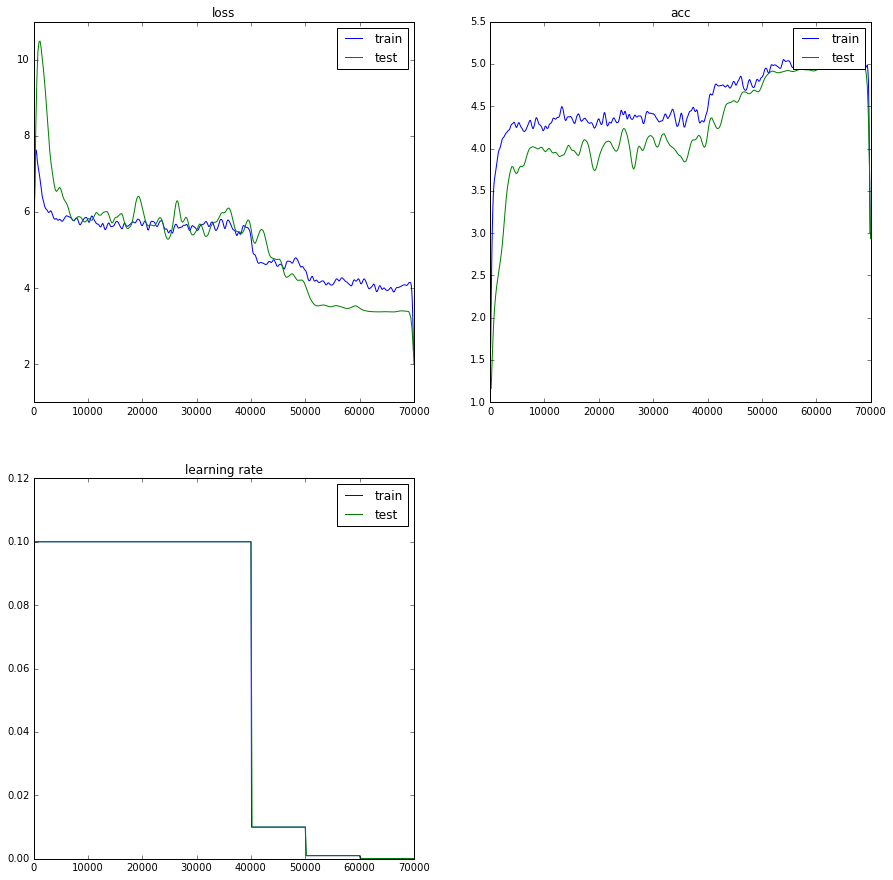

In [52]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
l1, l2 = ax1.plot(iters_train, loss_train_smooth, iters_test, loss_test_smooth)
ax1.set_title('loss')
ax1.legend((l1, l2), ('train', 'test'))

ax2 = fig.add_subplot(222)
l3, l4 = ax2.plot(iters_train, acc_train_smooth, iters_test, acc_test_smooth)
ax2.set_title('acc')
ax2.legend((l3, l4), ('train', 'test'))

ax3 = fig.add_subplot(223)
l5, l6 = ax3.plot(iters_train, lr_train, iters_test, lr_test)
ax3.set_title('learning rate')
ax3.legend((l5, l6), ('train', 'test'))

plt.savefig('vis/curve.jpg')